# Clustering(K-means, Hierarchical)
목표: K-means, Hierarchcial Clustering 결과와,
실제 Label(품종) 과의 비교 and 시각화

# 0. 데이터 전처리 (2010_Census_Populations_by_Zip_Code)

0) 필요한 라이브러리 import 

In [16]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [17]:
import numpy as np
import pandas as pd

1) importing flat files with pandas-R의 dataframe과 유사,excel과 유사 
  - numpy로도 가능하지만 array형식이어서,
   
   pandas 형태로 불러들이는 것이 데이터 핸들링에 편하다 (칼럼명도 나와있고)

In [18]:
filename='2010_Census_Populations_by_Zip_Code.csv'
data= pd.read_csv(filename)

2) 처음 5개 행만 확인 - R의 head() 함수와 유사

In [19]:
data.describe()

,Zip Code,Total Population,Median Age,Total Males,Total Females,Total Households,Average Household Size
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,91000.673981,33241.341693,36.527586,16391.564263,16849.777429,10964.570533,2.828119
std,908.360203,21644.417455,8.692999,10747.495566,10934.986468,6270.646400,0.835658
min,90001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90243.500000,19318.500000,32.400000,9763.500000,9633.500000,6765.500000,2.435000
50%,90807.000000,31481.000000,37.100000,15283.000000,16202.000000,10968.000000,2.830000
75%,91417.000000,44978.000000,41.000000,22219.500000,22690.500000,14889.500000,3.320000
max,93591.000000,105549.000000,74.000000,52794.000000,53185.000000,31087.000000,4.670000


# 1. Zip Code 제거 - K-means clustering 에 사용안함

In [20]:
data=data.drop(['Zip Code'],axis=1)

# 결측값 제거 

In [21]:
data=data.dropna(how="any")

# 첫번째 관측치 제거 

In [22]:
data=data[1:]

# 1. K-means Clustering

In [23]:
from sklearn.cluster import KMeans

1) k-means cluster에서, k, 즉 , 군집갯수를 결정해야함 (탐색범위 k=1~15)

In [24]:
from scipy.spatial.distance import cdist
clusters=range(1,15)
meandist=[]

3) 아래에서 구하려는 그래프 : 군집갯수 k에 따른 SSE plot( Elbow point k 가 opimal number of clusters)

- x축이 cluster 갯수, y축이 SSE: 각 점들이 할당되는 클러스터의 Centroid까지의 거리를 모든 포인트에 대해 합한것
- 이것이 작을수록 좋은 것인데, Elbow point란 이 Y 축이 딱 꺾이는 점 혹은 그 이후 값을 좋은 Cluster 갯수로 택한다. 



Text(0.5,1,'Selecting k with the Elbow Method')

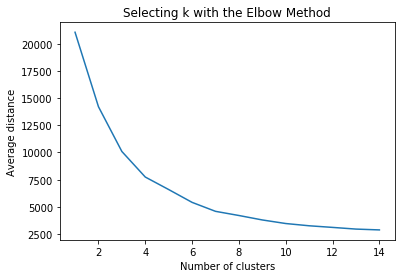

In [25]:
np.random.seed(1337) # for reproducibility - 지정해주지 않으면 clustering 결과가 바뀐다.

from scipy.spatial.distance import cdist
import matplotlib.pylab as plt
clusters=range(1,15)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data)
    clusassign=model.predict(data)
    meandist.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1))
    / data.shape[0])

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') 
# pick the fewest number of clusters that reduces the average distance
# If you observe after 3 we can see graph is almost linear

4) 위의 plot 에서 Elbow point를 k=2으로 보고 k=2인 k-means clustering 수행

In [26]:
np.random.seed(1337) # for reproducibility - 지정해주지 않으면 clustering 결과가 바뀐다.

model = KMeans(n_clusters=2)
model.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
print(model.labels_)

[1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0
 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0
 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0]


5) 원래 iris data(이름:data)에 k-means clustering 결과 할당된 cluster column 추가
 - 원래 label과 비교 용 : 여러 Insight를 얻을 수 있음
 - 시각화 기능 : 수치로 보는 것보다 시각화는 한 눈에 보기 때문에 더 좋음 

In [28]:
data['predictedY'] = model.labels_

In [29]:
data['predictedY'].value_counts()

0    226
1     92
Name: predictedY, dtype: int64

6) K-means 결과 시각화 (x축: petal.length, y축: petal.width, 점의 색깔: 클러스터 결과(0,1,2))

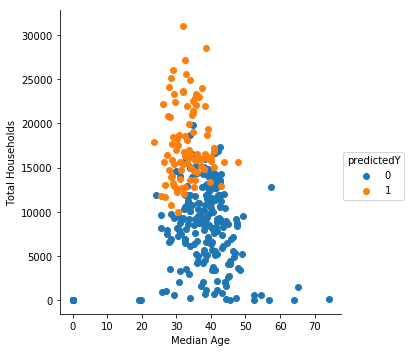

In [30]:
import seaborn as sns;
import matplotlib.pyplot as plt #Visualize 
sns.FacetGrid(data, hue="predictedY", size=5) \
   .map(plt.scatter, "Median Age", "Total Households") \
   .add_legend()